# **Part 1: Data Preprocessing**

In [ ]:
# 0. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Loading the Dataset
data = pd.read_csv('Netflix_Userbase.csv')

# 2. Missing Values
print(data.isnull().sum())

# 3. Encode Categorical Variables
data_encoded = pd.get_dummies(data, drop_first=True)

# 4. Feature Selection
data_encoded.head(1000)

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


,User ID,Monthly Revenue,Age,Subscription Type_Premium,Subscription Type_Standard,Join Date_01-05-23,Join Date_01-06-22,Join Date_01-07-22,Join Date_01-08-22,Join Date_01-09-22,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,1,10,28,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,2,15,35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,12,42,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,4,12,51,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,33,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,15,46,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
996,997,14,51,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
997,998,15,41,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
998,999,10,50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# **Part 2: Exploratory Data Analysis (EDA)**

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


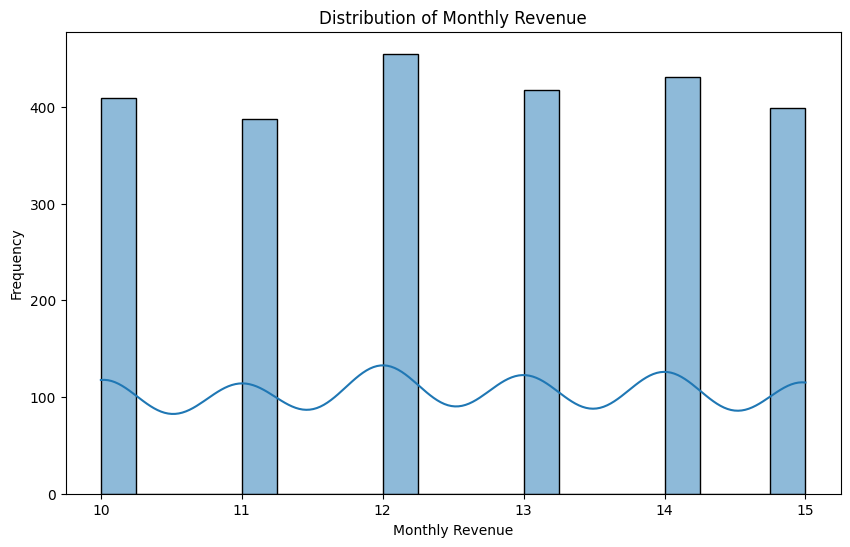

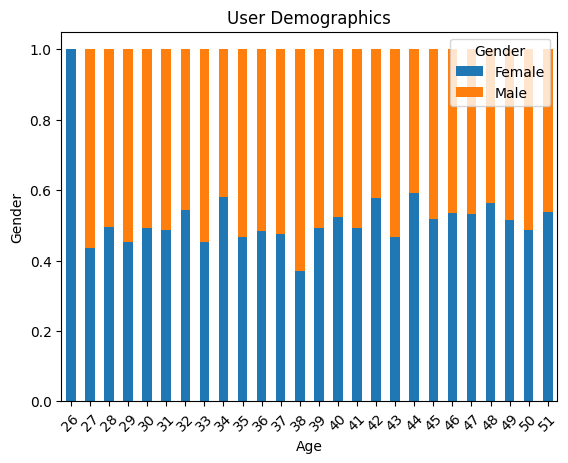

In [ ]:
# 1. Descriptive Statistics
print(data.describe())

# 2. Visualizations
# Distribution of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()


# User Demographics
UserDemo = data.groupby('Age')['Gender'].value_counts(normalize=True).unstack()
UserDemo.plot(kind='bar', stacked=True)
plt.title('User Demographics')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()



# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

Slope:  -0.007171563890830623
Intercept:  13.906556148996602
R-squared: -0.17552958826823084
RMSE: 1.8019423146739808


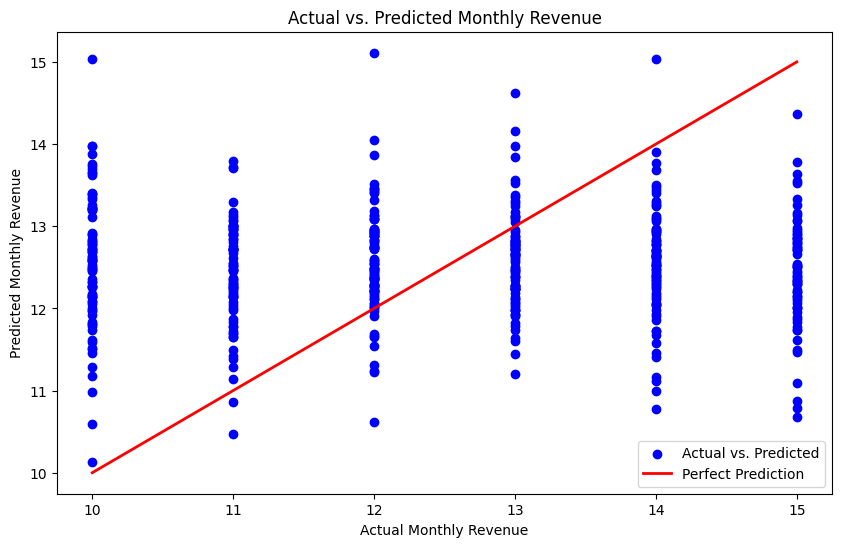

In [ ]:
# 1. Build the Model
X = data_encoded.drop(['User ID', 'Monthly Revenue'], axis=1)
y = data_encoded['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

slope = lr_model.coef_[0]
intercept = lr_model.intercept_

print('Slope: ', slope)
print('Intercept: ', intercept)

# 2. Model Evaluation
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)

# Visualizing the Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Monthly Revenue')
plt.xlabel('Actual Monthly Revenue')
plt.ylabel('Predicted Monthly Revenue')
plt.legend()
plt.show()

# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
# Building the model
X_logistic = data_encoded.drop(['User ID'], axis=1)
y_logistic = data_encoded['Age'] # I Used Age as a substitute for feedback
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Model Evaluation
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic, average='weighted')
recall = recall_score(y_test_logistic, y_pred_logistic, average='weighted')
f1 = f1_score(y_test_logistic, y_pred_logistic, average='weighted')
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.11
Precision: 0.1292377233301614
Recall: 0.11
F1 Score: 0.10740883388705749
Confusion Matrix:
 [[2 3 3 2 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 3 4 3 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 4 5 2 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 4 2 0 1 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 5 1 0 4 1 1 0 0 0 3 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 2 2 1 3 2 1 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 2 4 1 2 0 3 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 3 2 0 0 2 4 1 0 1 2 3 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 2 1 0 2 0 0 1 0 4 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 0 3 2 2 0 4 0 2 2 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 4 2 1 2 0 2 0 3 3 2 1 1 1 0 2 1 0 0]
 [0 0 0 0 2 0 3 1 4 1 0 0 2 1 1 1 1 0 0 0 0 2 0 0 0]
 [0 0 0 0 1 1 0 1 1 2 1 1 3 0 2 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 1 2 0 3 2 0 1 2 0 1 0 0 2 4 0 0]
 [0 0 0 0 0 0 0 0 4 0 1 1 4 2 6 1 0 1 1 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 2 2 4 2 3 0 0 0 4 1 1 2 0]
 [0 0 0 0 0 0 0 0 1 1 2 1 3 0 1 0 0 0 0 0 0 5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Part 5: Comparative Analysis and Visualization**

In [ ]:
# Feature Importance for Linear Regression
lr_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
lr_coefficients = lr_coefficients.sort_values(by='Coefficient', ascending=False)
print(lr_coefficients)

# Feature Importance for Logistic Regression
logistic_coefficients = pd.DataFrame({'Feature': X_logistic.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print(logistic_coefficients)

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_coefficients)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Insights
print("""
• Model Predictions

- Linear Regression Model
More than half of consumers often purchase Netflix's basic bundle because it
It is seen in the linear regression model that the monthly revenue is '12'.

- Logistic Regression Model
The provided CSV file lacked a "feedback" field, therefore I used Age as a
substitute for it, and I believe that given my skills and understanding
I'm going to consider this to be impossible because of the "feedback"
There is no column

• Monthly Revenue Influence

The greatest factor affecting monthly revenue is age; the younger the consumer the more they would likely purchase Netflix subscriptions.

• Feedback Influence

Because the "feedback" is absent from the csv, I am unable to comment on this.
document.
""")